# Introduction aux réseaux de neurones en Python

## MLP vs. Deep Learning

Une librairie comme `scikit-learn` n'est pas orientée vers le Deep Learning. Néanmoins, `scikit-learn` dispose de module permettant la construction de réseaux de neurones peu profonds. A l'inverse des librairies comme `tensorflow`, `pytorch` ont été conçues pour le Deep Learning mais permettent aussi d'entraîner des MLP et au-delà (modèles linéaires, SVM, gradient boosting) au prix d'une flexibilité moins grande qu'en Python. Même si les librairies de Deep Learning fournissent des API Python, il se peut que certaines fonctionnalités et de petites modifications ne soient pas simples car le code source est en C++. Dans ce notebook, on présente l'utilisation de `scikit-learn`, les frameworks de Deep Learning feront l'objet d'un notebook séparé.

## Première version des MLP pour la classification

### Premier exemple du cours



In [1]:
from sklearn import metrics, datasets

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = sns.load_dataset('iris')

Regardons la description des données

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Il y a 4 variables d'entrée et 1 classe

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Traçons les données

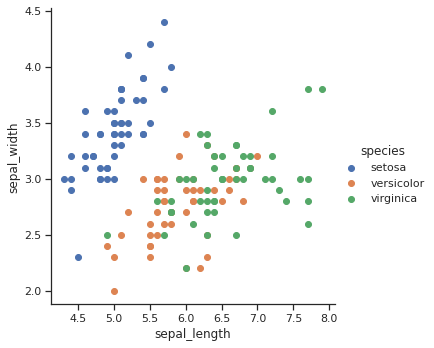

In [8]:
sns.FacetGrid(iris, hue="species",height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

Visualisation des autres coordonnées

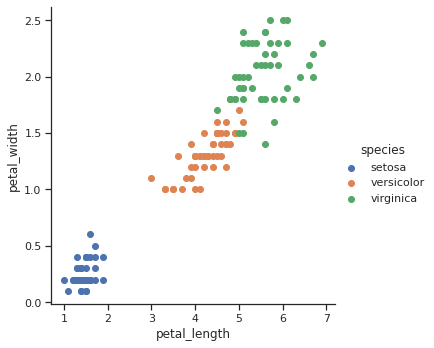

In [9]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

Pairplot avec pandas et seaborn

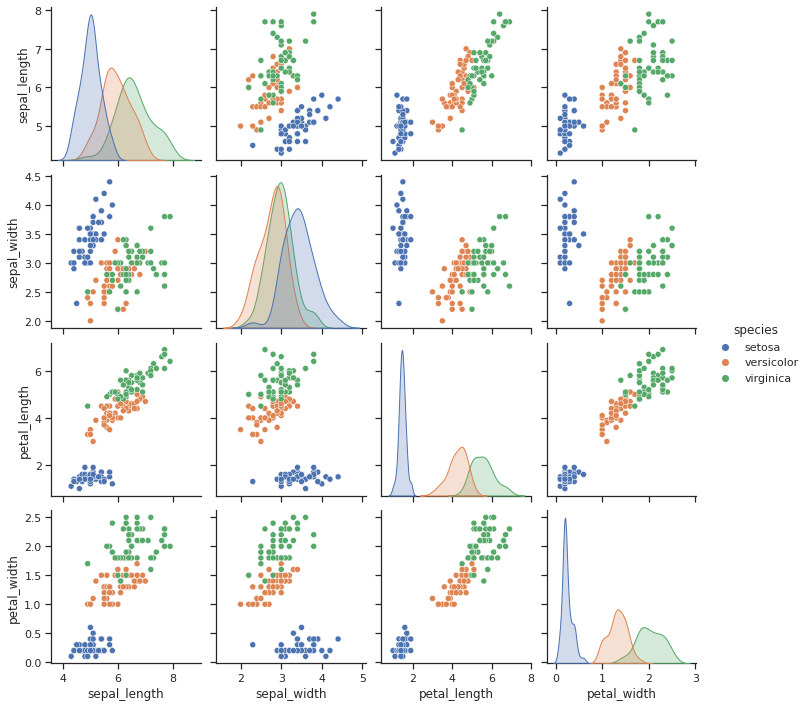

In [10]:
sns.pairplot(iris, hue="species")

Séparons les 150 données en 75 données d'apprentissage et 75 de test

In [11]:
from sklearn.model_selection import train_test_split

Cette dernière fonction est très simple

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [32]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.50)

Construisons un MLP pour la classification des données avec 2 neurones cachés et une pénalisation sur les poids de 0.01

In [178]:
mlp_iris=MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(2,), random_state=1, max_iter=1000)

In [34]:
mlp_iris.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(2,), max_iter=1000,
              random_state=1, solver='lbfgs')

Faisons maintenant la prédiction sur la base de test

In [35]:
y_pred=mlp_iris.predict(X_test)

Traçons la matrice de confusion

In [36]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[26  0  0]
 [ 0 18  4]
 [ 0  0 27]]


**Exercice** : Tester avec seulement 25 exemples dans la base d'apprentissage et sans pénalisation sur les poids

## Première version des MLP pour la régression

## Deuxième exemple du cours

In [37]:
from math import *

In [38]:
import numpy as np

In [39]:
from sklearn.neural_network import MLPRegressor

Définissons la fonction f1

In [40]:
def f1(x):
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    return np.sin(x1)/x1+0.1*x3**4+2*np.sin(x2)**2

Définissons les données d'entrée qui suivent une loi uniforme entre - Pi et Pi

In [41]:
x=np.random.uniform(-pi,pi,450)

In [42]:
x=np.reshape(x,(150,3))

In [43]:
y=f1(x)

In [44]:
from sklearn.model_selection import train_test_split

Séparons les 150 données avec 1/4 de données test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Construction du réseau

In [46]:
nnet=MLPRegressor(hidden_layer_sizes=(11,),max_iter=10000,activation='tanh',alpha=0.01,solver='lbfgs')

Apprentissage

In [47]:
nnet.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(11,),
             max_iter=10000, solver='lbfgs')

Prédiction

In [48]:
y_pred=nnet.predict(X_test)

Visualisation

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sin', 'hypot', 'nan', 'cos', 'expm1', 'floor', 'log1p', 'e', 'gcd', 'frexp', 'sqrt', 'trunc', 'sinh', 'inf', 'radians', 'exp', 'isfinite', 'remainder', 'modf', 'ceil', 'copysign', 'fmod', 'fabs', 'ldexp', 'log2', 'pi', 'isnan', 'isclose', 'isinf', 'cm', 'log', 'tanh', 'cosh', 'degrees', 'log10', 'tan', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


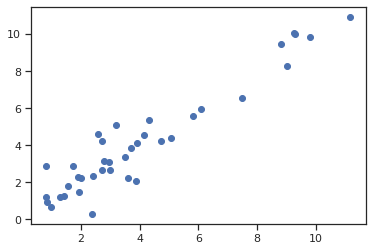

In [50]:
plt.plot(y_pred, y_test,'o')

Calcul du coefficient de détermination R2 et RMSE

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
r2_score(y_test,y_pred)

0.8985695340236671

In [53]:
mean_squared_error(y_test,y_pred)

0.8314764531425475

Validation croisée

In [54]:
from sklearn.model_selection import KFold, cross_val_score

In [55]:
kf = KFold(n_splits=5, shuffle=True)

In [56]:
 print(cross_val_score(nnet, x, y, cv=kf))  

[0.99782915 0.62973484 0.99907128 0.99707425 0.70316633]


2 neurones cachés - decay 0.01

In [57]:
nnet=MLPRegressor(hidden_layer_sizes=(2,),max_iter=1000,activation='tanh',alpha=0.01,solver='lbfgs')

In [67]:
nnet.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(2,),
             max_iter=1000, solver='lbfgs')

In [68]:
y_pred=nnet.predict(X_test)

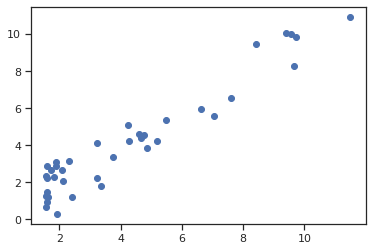

In [69]:
plt.plot(y_pred, y_test,'o')

In [70]:
r2_score(y_test,y_pred)

0.9118708481153138

In [71]:
mean_squared_error(y_test,y_pred)

0.7224389035601769

**Exercice** : Tester sans pénalisation et avec différents nombres de neurones cachés

Validation croisée pour trouver meilleurs paramètres

In [72]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` va nous permettre de procéder à une validation croisée directement sans avoir à la programmer - Attention c'est long et il faut augmenter le nombre d'itérations maximal pour converger

In [73]:
parameter_list = {
    'hidden_layer_sizes': [(2,),(6,),(8,),(10,),(12,),(14,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.005,0.01,0.05,0.1],
    'learning_rate': ['constant','adaptive'],
}
mlp=MLPRegressor(max_iter=10000)
gridCV = GridSearchCV(estimator=mlp, param_grid=parameter_list,cv=5)


In [74]:
gridCV.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.005, 0.01, 0.05, 0.1],
                         'hidden_layer_sizes': [(2,), (6,), (8,), (10,), (12,),
                                                (14,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

Meilleurs paramètres

In [75]:
print('Best parameters found:\n', gridCV.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (14,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


Ensemble des résultats

In [76]:
means = gridCV.cv_results_['mean_test_score']
stds = gridCV.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

-0.033 (+/-0.559) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'sgd'}
-0.185 (+/-0.360) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'adam'}
0.180 (+/-1.094) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
-0.052 (+/-0.864) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
-0.146 (+/-0.489) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.138 (+/-1.331) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.199 (+/-1.147) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (6,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.219 (+/-0.816) for {'activation': 'tanh', '

# Essai sur la base de chiffres MNIST

In [77]:
import numpy as np 
import matplotlib.pyplot as plt

On importe les données

In [78]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X=X/255.

In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Format des données

In [80]:
print("Image Data Shape" , X.shape)

Image Data Shape (70000, 784)


In [81]:
print("Label Data Shape", y.shape)

Label Data Shape (70000,)


Les données sont des images 28 par 28 

On visualise une des données

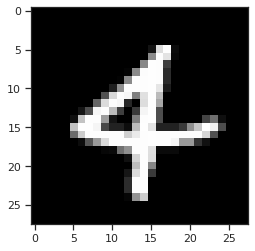

In [82]:
plt.figure()
image=X.iloc[150]
plt.imshow(np.reshape(np.array(image), (28,28)), cmap=plt.cm.gray)


In [83]:
print(y[0:20])

0     5
1     0
2     4
3     1
4     9
5     2
6     1
7     3
8     1
9     4
10    3
11    5
12    3
13    6
14    1
15    7
16    2
17    8
18    6
19    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


### On construit un MLP

In [84]:
from sklearn.neural_network import MLPClassifier

In [85]:
classif = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(256,), random_state=1, alpha=0.005)

In [86]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [87]:
classif.fit(X_train, y_train)   

MLPClassifier(alpha=0.005, hidden_layer_sizes=(256,), random_state=1,
              solver='lbfgs')

In [88]:
y_pred = classif.predict(X_test)

In [89]:
print('Test accuracy:', classif.score(X_test, y_test))

Test accuracy: 0.9774


In [90]:
from sklearn import metrics

In [91]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 970    0    2    0    0    1    3    0    2    2]
 [   0 1124    2    1    0    1    2    1    4    0]
 [   2    0 1006    2    1    0    5    5   11    0]
 [   2    0    4  986    0    4    0    3    5    6]
 [   0    0    4    0  958    1    4    2    0   13]
 [   1    0    0   13    1  866    3    2    3    3]
 [   4    3    2    1    5    3  935    2    3    0]
 [   1    4    6    6    2    0    0  997    6    6]
 [   4    0    2    5    4    1    1    3  950    4]
 [   1    2    1    2    8    5    1    6    1  982]]


**MLP très simple avec Keras**

In [164]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

In [168]:
def MLP_keras():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(((784,)), name="InputLayer"))
    model.add(keras.layers.Dense(350, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(100, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(10, activation='softmax',name='Output'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [169]:
model=MLP_keras()

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 350)               274750    
                                                                 
 Dense_n2 (Dense)            (None, 100)               35100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 310,860
Trainable params: 310,860
Non-trainable params: 0
_________________________________________________________________


In [170]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [171]:

entrainement = model.fit(X_train,y_train_one_hot)

1875/1875 [==============================] - 13s 6ms/step - loss: 0.2016 - accuracy: 0.9400


In [173]:
loss, acc = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

313/313 [==============================] - 2s 4ms/step - loss: 0.0956 - accuracy: 0.9707


In [174]:
y_pred1 = model.predict(X_test)

In [177]:
cm = metrics.confusion_matrix(y_test.astype('int'), np.argmax(y_pred1,axis=1))
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 968    0    2    1    0    1    2    2    4    0]
 [   0 1122    2    2    0    1    1    3    4    0]
 [   2    6  997    1    2    0    0   19    4    1]
 [   0    0    5  985    1    4    0    8    3    4]
 [   0    0    5    0  956    0    4    3    4   10]
 [   3    0    0   13    1  857    8    4    4    2]
 [   8    3    5    0    5    6  926    1    4    0]
 [   1    5    4    1    0    0    0 1015    0    2]
 [   3    2    1   14    4    4    1   10  931    4]
 [   5    5    1   11    9    2    0   22    4  950]]


Passage en pandas Dataframe pour la visualisation

In [92]:
import pandas as pd

In [104]:
feat_cols = [ 'pixel'+str(i+1) for i in range(X_test.shape[1]) ]

In [105]:
df = pd.DataFrame(X_test,columns=feat_cols)

In [106]:
df['labels'] = y_test

In [107]:
df['labels'] = df['labels'].apply(lambda i: str(i))

In [108]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (10000, 785)


### Visualisation avec PCA

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA(n_components=3)

In [112]:
pca_result = pca.fit_transform(df[feat_cols].values)

In [113]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

Variance expliquée

In [114]:
pca.explained_variance_ratio_

array([0.10047663, 0.07544487, 0.06140516])

Visualisation sur 2 premières composantes

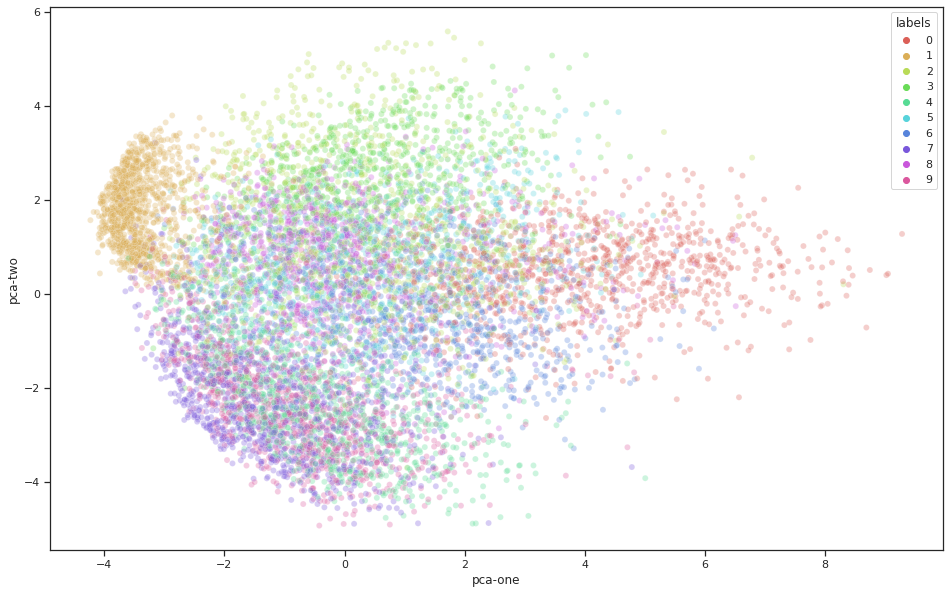

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

### Visualisation avec t-SNE

La méthode t-SNE (t Distributed Stochastic Neighbor Embedding) est une méthode très performante de visualisation en 2D de données en grande dimension.  C’est une méthode de réduction de dimension non linéaire qui préserve les similitudes entre les individus : deux individus similaires dans l’espace d’origine sont modélisés par des points proches en 2D, et deux individus de faible similitude par des points distants. 
Elle se déroule en 2 étapes :
-	On commence par construire une loi de probabilité sur les paires d’individus ($x_i,x_j$) dans l’espace d’origine, qui favorise les individus similaires :	
$$p_{j|i}=\frac{exp(-\frac{\|x_i-x_j\|^2}{2\sigma_i^2})}{\sum_{k \neq i}exp(-\frac{\|x_i-x_k\|^2}{2\sigma_i^2})}  $$ 
$$ p_{ij}=\frac{p_{j|i}+p_{i|j}}{2n} $$ 
 
avec N le nombre d’individus et $σ_i$ la variance de la Gaussienne. La similitude entre un individu $x_j$ et un individu $x_i$ correspond à la probabilité conditionnelle $p_{j|i}$ que $x_i$ choisisse $x_j$ comme voisin, si les voisins étaient choisis proportionnellement à leur densité de probabilité, une Gaussienne centrée en $x_i$.

-	On construit une loi sur les paires d’individus ($y_i,y_j$) dans l’espace en dimension réduite :
$$q_{ij}=\frac{{(1+\|y_i-y_j\|^2)}^{-1}}{\sum_{k \neq l} {(1+\|y_k-y_l\|^2)}^{-1}}$$ 
 
-	Les coordonnées des points yi dans le plan en 2 dimensions sont estimées en minimisant la divergence de Kullback-Leibler KL entre les deux distributions p et q, afin de préserver les similitudes entre les individus dans l’espace 2D.

 $$KL(p|q)=\sum_{i \neq j}p_{ij} log\frac{p_{ij}}{q_{ij}}$$

Cette méthode qui préserve les similitudes, et donc les structures locales, peut aussi mettre en évidence des informations sur la structure globale des données, comme un découpage en clusters. 


In [116]:
from sklearn.manifold import TSNE

In [117]:
tsne=TSNE(n_components=2, random_state=1)

In [118]:
X_2d=tsne.fit_transform(df[feat_cols].values)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [119]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [120]:
df['tsne-1'] = X_2d[:,0]
df['tsne-2'] = X_2d[:,1]

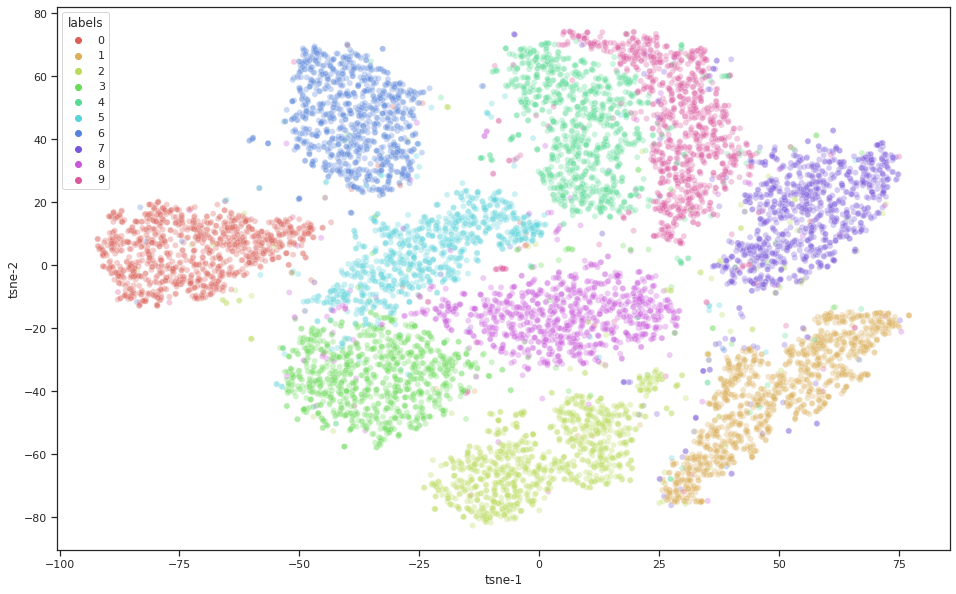

In [121]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


Suivons les recommandations et faisons d'abord une ACP pour nous ramener en dimension 50

In [122]:
pca_50 = PCA(n_components=50)

In [123]:
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

Variance expliquée par les 50 premières composantes

In [124]:
np.sum(pca_50.explained_variance_ratio_)

0.8315867850126457

In [125]:
tsne = TSNE(n_components=2)

In [126]:
X_2dred = tsne.fit_transform(pca_result_50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [127]:
df['tsne-1-red'] = X_2dred[:,0]
df['tsne-2-red'] = X_2dred[:,1]

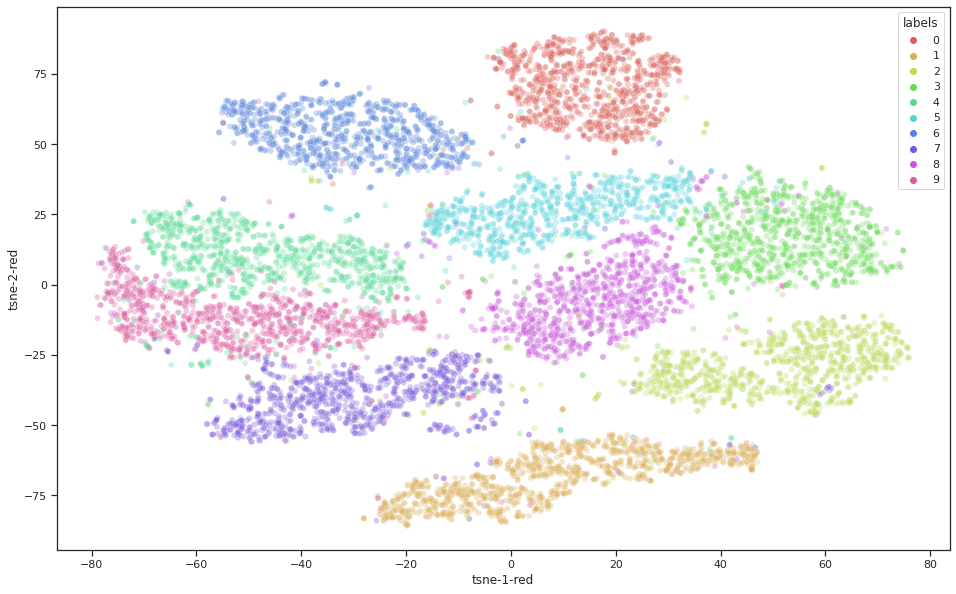

In [128]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-1-red", y="tsne-2-red",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)